# **CS 4361/5361 Machine Learning**

**Lab 2: Can we drink the water?**

Comparison of k-nn, Naive Bayes and Decision trees.

Due September 27, 2021

**Author:** [Olac Fuentes](http://www.cs.utep.edu/ofuentes/)<br>
**Last modified:** 2021/09/16<br>

# **Introduction**

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection.

The World Health Organization has asked YOU to write a program to determine if the water from a water body (lake or river) is safe to drink, given the results of some chemical analyses of a sample from it. Your program would receive the results of the analyses as input, and output 1 if the water is safe to drink, and 0 otherwise. 

Since your program most likely won't be 100% accurate, you have also been asked to estimate the probability that predictions made by your program are correct. Of course, the higher the accuracy, the better. 



The file *water_potability.xlsx* contains water quality metrics for 2011 different water bodies.

**1. pH value:**
PH is an indicator of acidic or alkaline condition of water. 

**2. Hardness:**
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. 

**3. Solids (Total dissolved solids - TDS):**
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. The water with high TDS value indicates that water is highly mineralized. 

**4. Chloramines:**
Chlorine and chloramine are the major disinfectants used in public water systems.

**5. Sulfate:**
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. 

**6. Conductivity:**
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. 

**7. Organic_carbon:**
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. 

**8. Trihalomethanes:**
THMs are chemicals which may be found in water treated with chlorine. 

**9. Turbidity:**
The turbidity of water depends on the quantity of solid matter present in the suspended state. 

**10. Potability:**
Wheather the water from the given water body was safe to drink.


USe the following code to upload the data to your Colab folder.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving water_potability.xlsx to water_potability.xlsx


Make sure your file is in your folder.

In [ ]:
!ls

sample_data  water_potability.xlsx


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from sklearn.metrics import accuracy_score, confusion_matrix,mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

We will use the Pandas library to read the excel file. Don't worry about the details of Pandas usage. For now we will use it to read the file and visualize the data. The data will be then converted to a numpy array and processed in the standard way. 

In [4]:
water_df = pd.read_excel('water_potability.xlsx')

The data are now stored in a Pandas data frame. We can display the column names and the feature values by typing the data frame's name in a cell. 

Thus we can verify that the number of features and the number of examples are correct.

In [5]:
water_df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.899452,210.734124,15896.365940,6.907203,319.886957,448.666423,18.169921,124.000000,2.853767,1
1,6.145148,197.541072,39657.272110,9.900159,288.157883,319.434033,11.587378,120.030077,4.600886,0
2,5.036454,190.164520,29258.738140,4.991061,300.475925,332.359715,11.055801,116.161622,3.534665,1
3,8.969697,195.744765,9049.682595,7.467068,396.453568,378.528511,17.757697,114.208671,3.983099,0
4,8.285072,151.573778,14402.726700,9.050080,303.081838,322.521815,13.652653,114.034946,4.274661,1
...,...,...,...,...,...,...,...,...,...,...
2006,7.058866,191.548401,16473.067090,8.435789,367.853180,462.993729,12.574420,17.527765,3.937334,1
2007,8.281121,227.654351,17995.405220,7.493279,323.379987,459.865512,14.363661,16.291505,3.687995,0
2008,6.946718,214.170043,32946.567520,5.484258,333.439570,318.883636,12.809956,15.684877,4.934986,0
2009,7.783306,196.815952,24789.354730,6.548497,331.036776,372.764982,12.066182,14.343161,5.045620,0


Since the classifiers we have been using expect data to be given as numpy arrays, we extract the data from water_df to a numpy array.

In [6]:
water_np = water_df.to_numpy()

In [7]:
print(water_np.shape)

(2011, 10)


# **Assignment:**

**Part 1.** Write, as a text cell, the sequence of steps that you need to perform in order to fullfill your mission. 

Recall that your mission consists of providing the following:

*   **Classifier**, a trained sklearn model  that they can use to predict potability from the 9 attributes mentioned above
*   **Accuracy**, a floating point value between 0 and 1 indicating how accurate you expect your model to be when used on data not included in the file provided. 

For this assignment, limit your choice of classfiers to k-nearest neighbors, naive Bayes and decision trees. 

You may use the sklearn implementations of all classifiers. 





1.   Read the data
2.   Convert data to numpy 2D array
3.   Convert data into train and test sets
4.   build a knn model with train data
5.   classify test data
6.   get accuracy using model
7.   use naive bayes with test data to generate model
8.   classify test data with naive bayes
9.   get accuracy from naive bayes model
9.   build a decision tree using train data 
10.  Use decision tree to classify test data and get accuracy
11.  compare all models and get the most accurate one




**Part 2.** Implement the steps described above as a Python program. 

In [8]:
def accuracy(p,y):
    return np.mean(p==y)

In [20]:
train_split = 0.8
split = int(water_np.shape[0]*train_split+0.5)

y_train,y_test = water_np[:split,-1] , water_np[split:,-1]
x_train , x_test = water_np[:split,:-1] , water_np[split:,:-1]
print(x_train.shape , x_test.shape)

accuracys = []
times = []
error = []

(1609, 9) (402, 9)


In [21]:
start = time.time()
knn =  KNeighborsClassifier(n_neighbors = 10 , weights='uniform', algorithm='brute', n_jobs=-1)
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)
elapsed_time = time.time() - start
accuracys.append(accuracy(knn_pred,y_test))
times.append(elapsed_time)
print('Accuracy = {:.4f}'.format(accuracy(knn_pred,y_test)))
print('Elapsed time = {:.4f} secs'.format(elapsed_time))

Accuracy = 0.6070
Elapsed time = 0.1431 secs


In [22]:
start = time.time()
gnb = GaussianNB().fit(x_train, y_train)
gnb_pred = gnb.predict(x_test)
elapsed_time = time.time() - start
accuracys.append(accuracy(gnb_pred,y_test))
times.append(elapsed_time)
print('Accuracy = {:.4f}'.format(accuracy(gnb_pred,y_test)))
print('Elapsed time = {:.4f} secs'.format(elapsed_time))

Accuracy = 0.6095
Elapsed time = 0.0080 secs


In [23]:
start = time.time()
bnb = BernoulliNB().fit(x_train, y_train)
bnb_pred = bnb.predict(x_test)
elapsed_time = time.time() - start
accuracys.append(accuracy(bnb_pred,y_test))
times.append(elapsed_time)
print('Accuracy = {:.4f}'.format(accuracy(bnb_pred,y_test)))
print('Elapsed time = {:.4f} secs'.format(elapsed_time))

Accuracy = 0.5920
Elapsed time = 0.0036 secs


In [24]:
baseline = np.mean(y_train)+np.zeros_like(y_test)
print('Mean squared error = {:5.2f}'.format(mean_squared_error(baseline,y_test)))
print('Mean absolute error =  {:5.2f}'.format(mean_absolute_error(baseline,y_test)))

Mean squared error =  0.24
Mean absolute error =   0.48


In [68]:
start = time.time()
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_test)
elapsed_time = time.time() - start
print('Mean squared error = {:5.2f}'.format(mean_squared_error(dt_pred,y_test)))
print('Mean absolute error =  {:5.2f}'.format(mean_absolute_error(dt_pred,y_test))) 
print('Elapsed time = {:.4f} secs'.format(elapsed_time))

Mean squared error =  0.45
Mean absolute error =   0.45
Elapsed time = 0.0251 secs


In [66]:
start = time.time()
dtr = DecisionTreeRegressor(splitter = 'random')
dtr.fit(x_train,y_train)
dtr_pred = dtr.predict(x_test)
elapsed_time = time.time() - start
print('Mean squared error = {:5.2f}'.format(mean_squared_error(dt_pred,y_test)))
print('Mean absolute error =  {:5.2f}'.format(mean_absolute_error(dt_pred,y_test))) 
print('Elapsed time = {:.4f} secs'.format(elapsed_time))

Mean squared error =  0.41
Mean absolute error =   0.41
Elapsed time = 0.0069 secs


**Part 2b.** (Mandatory for CS5361, extra credit for CS4361). The file *water_potability_original.xlsx* contains a superset of the data in *water_potability.xlsx*, but some of the instances have missing values, indicated as an empty cell in the excel file. 

Repeat the experiments from part 2, but now use this bigger file. Replace missing values by the mean value of the corresponding attribute in the training set.

That is, if X_train[i,j] is missing, replace it by np.mean(X_train[ind,j]), where ind is the list of indices of examples where attribute j is not missing.

If X_test[i,j] is missing, replace it also by np.mean(X_train[ind,j]).

For extra credit, try a better way to 'guess' the missing values. 


**Part 3.** Write a report and submit it as an additional file in word or pdf format. Your report must include (at least) the following items:

1. Problem description
2. Algorithms implemented
3. Experimental results, including accuracies or mean squared errors and running times for each algorithm
and parameter choice. Use tables and/or plots to illustrate this. 
4. Discussion of results. How do algorithms compare in terms of accuracy/MSE and running times? What parameter choices work best? What parameter choices result in overfitting? 
5. Conclusions. What did you learn from the assignment?


Text(0, 0.5, 'Run times')

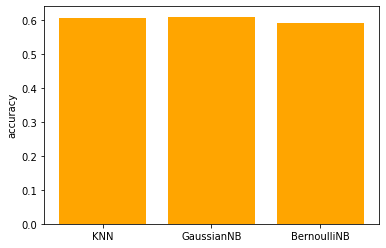

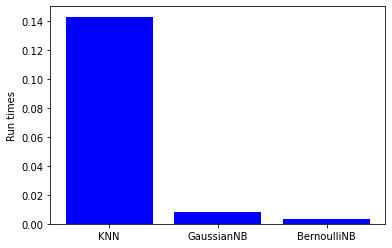

In [45]:
x = ["KNN" ,"GaussianNB", "BernoulliNB"]
plt.bar(x , accuracys, color ='orange')
plt.ylabel("accuracy")


plt.figure()
x = ["KNN" ,"GaussianNB","BernoulliNB"]
plt.bar(x , times, color ='blue')
plt.ylabel("Run times")

plt.figure()
x = ["baseline" , "Best tree" ,  "random"]